In [1]:
import numpy as np
from numpy import absolute
import pandas as pd
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.optimize
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(1234)

### Dataset Reading

In [3]:
df = pd.read_csv("train.csv"); df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
df1 = df.iloc[:,range(0,82,2)]; df1

,number_of_elements,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
0,4,57.862692,36.116612,1.062396,31.794921,53.622535,1010.268571,938.016780,0.791488,735.985714,...,61.015189,0.621979,0.262848,57.127669,138.517163,2.257143,2.219783,1.066221,1.085714,0.437059
1,5,58.518416,36.396602,1.057755,36.161939,53.979870,1010.612857,938.745413,0.807078,743.164286,...,61.372331,0.619735,0.567706,51.413383,139.630922,2.257143,2.210679,1.047221,1.128571,0.468606
2,4,57.885242,36.122509,0.975980,35.741099,53.656268,1010.820000,939.009036,0.773620,743.164286,...,60.943760,0.619095,0.250477,57.127669,138.540613,2.271429,2.232679,1.029175,1.114286,0.444697
3,4,57.873967,36.119560,1.022291,33.768010,53.639405,1010.544286,938.512777,0.783207,739.575000,...,60.979474,0.620535,0.257045,57.127669,138.528893,2.264286,2.226222,1.048834,1.100000,0.440952
4,4,57.840143,36.110716,1.129224,27.848743,53.588771,1009.717143,937.025573,0.805230,728.807143,...,61.086617,0.624878,0.272820,57.127669,138.493671,2.242857,2.206963,1.096052,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,43.135565,1.254119,15.504479,43.202659,753.793333,750.570867,0.927050,427.546667,...,111.537778,95.001493,0.634332,83.048889,46.595943,3.555556,3.519911,0.913658,2.168889,0.496904
21259,5,49.021367,32.867748,1.571630,7.353333,50.148287,989.819048,923.426093,0.988470,659.771429,...,108.680590,1.577047,0.745515,76.176553,156.558695,2.047619,2.038991,1.337246,0.904762,0.212959
21260,2,95.609104,95.464320,0.530198,53.041104,5.405448,691.580000,689.480961,0.542120,370.180000,...,57.400000,57.038314,0.559446,29.000000,6.800000,4.800000,4.781762,0.450561,3.200000,0.400000
21261,2,97.095602,96.901083,0.640883,31.115202,6.249958,706.969000,704.143255,0.648876,208.799000,...,59.270000,58.781651,0.659671,15.250000,7.862385,4.690000,4.665819,0.577601,2.210000,0.462493


In [185]:
#df1.describe()

### Summary

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   wtd_mean_atomic_mass             21263 non-null  float64
 2   wtd_gmean_atomic_mass            21263 non-null  float64
 3   wtd_entropy_atomic_mass          21263 non-null  float64
 4   wtd_range_atomic_mass            21263 non-null  float64
 5   wtd_std_atomic_mass              21263 non-null  float64
 6   wtd_mean_fie                     21263 non-null  float64
 7   wtd_gmean_fie                    21263 non-null  float64
 8   wtd_entropy_fie                  21263 non-null  float64
 9   wtd_range_fie                    21263 non-null  float64
 10  wtd_std_fie                      21263 non-null  float64
 11  wtd_mean_atomic_radius           21263 non-null  float64
 12  wtd_gmean_atomic_r

In [187]:
corr_df1 = df1.corr() ; corr_df1

,number_of_elements,wtd_mean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,...,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence,wtd_entropy_Valence,wtd_range_Valence,wtd_std_Valence
number_of_elements,1.000000,-0.353064,-0.454525,0.881845,-0.320293,0.546391,0.484445,0.424152,0.719209,0.329624,...,0.206069,-0.469206,0.207065,0.316772,0.665580,-0.648551,-0.659268,0.892559,-0.447770,0.035216
wtd_mean_atomic_mass,-0.353064,1.000000,0.964085,-0.412666,0.716623,-0.089471,-0.522595,-0.508109,-0.129779,-0.420457,...,-0.058075,0.250226,0.025638,-0.108512,-0.350993,0.545587,0.548981,-0.331025,0.330904,0.077323
wtd_gmean_atomic_mass,-0.454525,0.964085,1.000000,-0.484664,0.673326,-0.331657,-0.612317,-0.588014,-0.227652,-0.451326,...,-0.056793,0.322335,0.020495,-0.129212,-0.431027,0.614100,0.623261,-0.448072,0.409674,0.030361
wtd_entropy_atomic_mass,0.881845,-0.412666,-0.484664,1.000000,-0.543305,0.495970,0.531431,0.475331,0.698922,0.324119,...,0.184949,-0.505488,0.182082,0.302974,0.684497,-0.644336,-0.650247,0.918284,-0.546910,-0.006937
wtd_range_atomic_mass,-0.320293,0.716623,0.673326,-0.543305,1.000000,-0.063091,-0.409287,-0.393395,-0.234053,-0.114267,...,-0.061016,0.287490,0.009108,-0.069206,-0.346224,0.445874,0.445201,-0.409599,0.594214,0.092819
wtd_std_atomic_mass,0.546391,-0.089471,-0.331657,0.495970,-0.063091,1.000000,0.449619,0.406154,0.479914,0.226462,...,0.058402,-0.346671,0.066305,0.155144,0.443604,-0.394987,-0.414098,0.606574,-0.391024,0.155702
wtd_mean_fie,0.484445,-0.522595,-0.612317,0.531431,-0.409287,0.449619,1.000000,0.992331,0.079944,0.724828,...,-0.094193,-0.533758,-0.263213,0.108706,0.509899,-0.551527,-0.551444,0.446614,-0.391221,-0.125622
wtd_gmean_fie,0.424152,-0.508109,-0.588014,0.475331,-0.393395,0.406154,0.992331,1.000000,0.030222,0.711316,...,-0.111828,-0.485905,-0.258152,0.077105,0.445802,-0.479924,-0.480221,0.382479,-0.340174,-0.105682
wtd_entropy_fie,0.719209,-0.129779,-0.227652,0.698922,-0.234053,0.479914,0.079944,0.030222,1.000000,-0.280675,...,0.219691,-0.269555,0.463915,0.203354,0.385669,-0.340946,-0.375613,0.862061,-0.454246,0.332966
wtd_range_fie,0.329624,-0.420457,-0.451326,0.324119,-0.114267,0.226462,0.724828,0.711316,-0.280675,1.000000,...,-0.063461,-0.356802,-0.332363,0.188550,0.432511,-0.460419,-0.438015,0.137482,0.061797,-0.307760


In [188]:
upper_tri = corr_df1.where(np.triu(np.ones(corr_df1.shape), k = 1).astype(np.bool))

to_drop = [i for i in upper_tri.columns if any(upper_tri[i] > 0.8)]
print(to_drop)

df3 = df1.drop(to_drop, axis = 1, inplace= False)

['wtd_gmean_atomic_mass', 'wtd_entropy_atomic_mass', 'wtd_gmean_fie', 'wtd_std_fie', 'wtd_gmean_atomic_radius', 'wtd_entropy_atomic_radius', 'wtd_std_atomic_radius', 'wtd_mean_Density', 'wtd_gmean_Density', 'wtd_entropy_Density', 'wtd_range_Density', 'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'wtd_gmean_FusionHeat', 'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat', 'wtd_range_ThermalConductivity', 'wtd_mean_Valence', 'wtd_gmean_Valence', 'wtd_entropy_Valence']


/home/sysadm/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [189]:
df3

,number_of_elements,wtd_mean_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,wtd_mean_fie,wtd_entropy_fie,wtd_range_fie,wtd_mean_atomic_radius,wtd_range_atomic_radius,wtd_std_Density,...,wtd_range_ElectronAffinity,wtd_std_ElectronAffinity,wtd_mean_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_std_ThermalConductivity,wtd_range_Valence,wtd_std_Valence
0,4,57.862692,31.794921,53.622535,1010.268571,0.791488,735.985714,105.514286,42.914286,3572.596624,...,80.987143,42.558396,3.846857,4.666920,61.015189,0.621979,0.262848,138.517163,1.085714,0.437059
1,5,58.518416,36.161939,53.979870,1010.612857,0.807078,743.164286,104.971429,50.571429,3632.649185,...,81.207857,41.667621,3.796857,4.603000,61.372331,0.619735,0.567706,139.630922,1.128571,0.468606
2,4,57.885242,35.741099,53.656268,1010.820000,0.773620,743.164286,104.685714,49.314286,3592.019281,...,81.207857,41.639878,3.822571,4.649635,60.943760,0.619095,0.250477,138.540613,1.114286,0.444697
3,4,57.873967,33.768010,53.639405,1010.544286,0.783207,739.575000,105.100000,46.114286,3582.370597,...,81.097500,42.102344,3.834714,4.658301,60.979474,0.620535,0.257045,138.528893,1.100000,0.440952
4,4,57.840143,27.848743,53.588771,1009.717143,0.805230,728.807143,106.342857,36.514286,3552.668664,...,80.766429,43.452059,3.871143,4.684014,61.086617,0.624878,0.272820,138.493671,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,53.095769,15.504479,43.202659,753.793333,0.927050,427.546667,138.244444,57.808889,2978.412680,...,74.140000,55.219027,34.448000,17.657417,111.537778,95.001493,0.634332,46.595943,2.168889,0.496904
21259,5,49.021367,7.353333,50.148287,989.819048,0.988470,659.771429,112.000000,20.285714,3937.105612,...,74.090000,57.634544,4.793429,5.204855,108.680590,1.577047,0.745515,156.558695,0.904762,0.212959
21260,2,95.609104,53.041104,5.405448,691.580000,0.542120,370.180000,192.200000,124.600000,1381.200000,...,59.040000,12.960000,24.780000,4.040000,57.400000,57.038314,0.559446,6.800000,3.200000,0.400000
21261,2,97.095602,31.115202,6.249958,706.969000,0.648876,208.799000,189.010000,84.230000,1596.989169,...,43.332000,14.984781,23.669000,4.671182,59.270000,58.781651,0.659671,7.862385,2.210000,0.462493


### VIF 

In [190]:
X = add_constant(df1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                              1215.666567
number_of_elements                   11.093380
wtd_mean_atomic_mass                228.493710
wtd_gmean_atomic_mass               255.436330
wtd_entropy_atomic_mass              79.253192
wtd_range_atomic_mass                17.899582
wtd_std_atomic_mass                  14.845240
wtd_mean_fie                       2752.792777
wtd_gmean_fie                      1880.436149
wtd_entropy_fie                      71.213496
wtd_range_fie                        33.180007
wtd_std_fie                         100.846537
wtd_mean_atomic_radius              784.795542
wtd_gmean_atomic_radius            1224.443345
wtd_entropy_atomic_radius           138.368072
wtd_range_atomic_radius              15.468720
wtd_std_atomic_radius                45.177407
wtd_mean_Density                    118.597730
wtd_gmean_Density                   138.986042
wtd_entropy_Density                  18.869551
wtd_range_Density                    16.150832
wtd_std_Densi

### Splitting the dataset into training and test data

In [191]:
X = np.array(df3)
y = np.array(df.iloc[:,len((df.columns).values)-1])

In [192]:
# split the dataset into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# print train and test set shapes
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

X_train:(17010, 21)
y_train:(17010,)


In [193]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.837
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              4147.
Date:                Sat, 02 Apr 2022   Prob (F-statistic):                        0.00
Time:                        02:38:37   Log-Likelihood:                         -76002.
No. Observations:               17010   AIC:                                  1.520e+05
Df Residuals:                   16989   BIC:                                  1.522e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [194]:
#print("Parameters: ", res.params)
#print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Testing Accuracy:{}".format(r2_score(res.predict(X_test), y_test)))

R_squared value:  0.8367489179963215
Testing Accuracy:0.371668296627769


### Code for Calculating Batch_Gradient_Descent or Widrow Hoff algo

In [195]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

### Batch Gradient Descent

X_train:(17010, 21)
y_train:(17010,)
Iteration: 0, Cost: 1373.089
Iteration: 1, Cost: 1320.848
Iteration: 2, Cost: 1273.589
Iteration: 3, Cost: 1230.674
Iteration: 4, Cost: 1191.555
Iteration: 5, Cost: 1155.755
Iteration: 6, Cost: 1122.864
Iteration: 7, Cost: 1092.527
Iteration: 8, Cost: 1064.437
Iteration: 9, Cost: 1038.329
Iteration: 10, Cost: 1013.972
Iteration: 11, Cost: 991.168
Iteration: 12, Cost: 969.743
Iteration: 13, Cost: 949.548
Iteration: 14, Cost: 930.453
Iteration: 15, Cost: 912.345
Iteration: 16, Cost: 895.124
Iteration: 17, Cost: 878.705
Iteration: 18, Cost: 863.014
Iteration: 19, Cost: 847.985
Iteration: 20, Cost: 833.560
Iteration: 21, Cost: 819.689
Iteration: 22, Cost: 806.328
Iteration: 23, Cost: 793.439
Iteration: 24, Cost: 780.987
Iteration: 25, Cost: 768.942
Iteration: 26, Cost: 757.277
Iteration: 27, Cost: 745.968
Iteration: 28, Cost: 734.993
Iteration: 29, Cost: 724.335
Iteration: 30, Cost: 713.975
Iteration: 31, Cost: 703.898
Iteration: 32, Cost: 694.091
Itera

Iteration: 420, Cost: 239.770
Iteration: 421, Cost: 239.741
Iteration: 422, Cost: 239.713
Iteration: 423, Cost: 239.685
Iteration: 424, Cost: 239.657
Iteration: 425, Cost: 239.629
Iteration: 426, Cost: 239.601
Iteration: 427, Cost: 239.573
Iteration: 428, Cost: 239.546
Iteration: 429, Cost: 239.518
Iteration: 430, Cost: 239.491
Iteration: 431, Cost: 239.464
Iteration: 432, Cost: 239.437
Iteration: 433, Cost: 239.410
Iteration: 434, Cost: 239.383
Iteration: 435, Cost: 239.356
Iteration: 436, Cost: 239.330
Iteration: 437, Cost: 239.303
Iteration: 438, Cost: 239.277
Iteration: 439, Cost: 239.251
Iteration: 440, Cost: 239.224
Iteration: 441, Cost: 239.198
Iteration: 442, Cost: 239.172
Iteration: 443, Cost: 239.146
Iteration: 444, Cost: 239.121
Iteration: 445, Cost: 239.095
Iteration: 446, Cost: 239.069
Iteration: 447, Cost: 239.044
Iteration: 448, Cost: 239.018
Iteration: 449, Cost: 238.993
Iteration: 450, Cost: 238.968
Iteration: 451, Cost: 238.943
Iteration: 452, Cost: 238.918
Iteration:

Iteration: 856, Cost: 232.595
Iteration: 857, Cost: 232.585
Iteration: 858, Cost: 232.575
Iteration: 859, Cost: 232.564
Iteration: 860, Cost: 232.554
Iteration: 861, Cost: 232.544
Iteration: 862, Cost: 232.534
Iteration: 863, Cost: 232.523
Iteration: 864, Cost: 232.513
Iteration: 865, Cost: 232.503
Iteration: 866, Cost: 232.493
Iteration: 867, Cost: 232.483
Iteration: 868, Cost: 232.472
Iteration: 869, Cost: 232.462
Iteration: 870, Cost: 232.452
Iteration: 871, Cost: 232.442
Iteration: 872, Cost: 232.432
Iteration: 873, Cost: 232.422
Iteration: 874, Cost: 232.412
Iteration: 875, Cost: 232.402
Iteration: 876, Cost: 232.392
Iteration: 877, Cost: 232.382
Train Score: 0.3891307668746544
Test Score:  0.3136409917680586


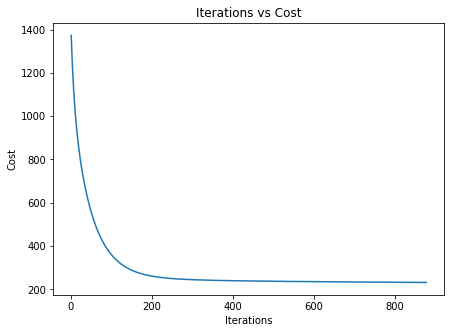

In [74]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=True)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

### Widrow Hoff Algorithm

X_train:(17010, 21)
y_train:(17010,)
Iteration: 0, Cost: 1362.681
Iteration: 1, Cost: 1312.892
Iteration: 2, Cost: 1267.555
Iteration: 3, Cost: 1226.130
Iteration: 4, Cost: 1188.148
Iteration: 5, Cost: 1153.200
Iteration: 6, Cost: 1120.931
Iteration: 7, Cost: 1091.033
Iteration: 8, Cost: 1063.236
Iteration: 9, Cost: 1037.305
Iteration: 10, Cost: 1013.037
Iteration: 11, Cost: 990.253
Iteration: 12, Cost: 968.797
Iteration: 13, Cost: 948.532
Iteration: 14, Cost: 929.341
Iteration: 15, Cost: 911.118
Iteration: 16, Cost: 893.772
Iteration: 17, Cost: 877.222
Iteration: 18, Cost: 861.398
Iteration: 19, Cost: 846.239
Iteration: 20, Cost: 831.688
Iteration: 21, Cost: 817.698
Iteration: 22, Cost: 804.226
Iteration: 23, Cost: 791.234
Iteration: 24, Cost: 778.688
Iteration: 25, Cost: 766.558
Iteration: 26, Cost: 754.817
Iteration: 27, Cost: 743.442
Iteration: 28, Cost: 732.411
Iteration: 29, Cost: 721.703
Iteration: 30, Cost: 711.303
Iteration: 31, Cost: 701.194
Iteration: 32, Cost: 691.362
Itera

Iteration: 277, Cost: 247.437
Iteration: 278, Cost: 247.341
Iteration: 279, Cost: 247.247
Iteration: 280, Cost: 247.153
Iteration: 281, Cost: 247.061
Iteration: 282, Cost: 246.971
Iteration: 283, Cost: 246.881
Iteration: 284, Cost: 246.793
Iteration: 285, Cost: 246.705
Iteration: 286, Cost: 246.619
Iteration: 287, Cost: 246.534
Iteration: 288, Cost: 246.450
Iteration: 289, Cost: 246.367
Iteration: 290, Cost: 246.285
Iteration: 291, Cost: 246.205
Iteration: 292, Cost: 246.125
Iteration: 293, Cost: 246.046
Iteration: 294, Cost: 245.968
Iteration: 295, Cost: 245.891
Iteration: 296, Cost: 245.815
Iteration: 297, Cost: 245.740
Iteration: 298, Cost: 245.666
Iteration: 299, Cost: 245.593
Iteration: 300, Cost: 245.521
Iteration: 301, Cost: 245.449
Iteration: 302, Cost: 245.378
Iteration: 303, Cost: 245.309
Iteration: 304, Cost: 245.240
Iteration: 305, Cost: 245.171
Iteration: 306, Cost: 245.104
Iteration: 307, Cost: 245.037
Iteration: 308, Cost: 244.971
Iteration: 309, Cost: 244.906
Iteration:

Iteration: 555, Cost: 237.317
Iteration: 556, Cost: 237.299
Iteration: 557, Cost: 237.281
Iteration: 558, Cost: 237.263
Iteration: 559, Cost: 237.245
Iteration: 560, Cost: 237.226
Iteration: 561, Cost: 237.208
Iteration: 562, Cost: 237.190
Iteration: 563, Cost: 237.172
Iteration: 564, Cost: 237.154
Iteration: 565, Cost: 237.136
Iteration: 566, Cost: 237.119
Iteration: 567, Cost: 237.101
Iteration: 568, Cost: 237.083
Iteration: 569, Cost: 237.065
Iteration: 570, Cost: 237.048
Iteration: 571, Cost: 237.030
Iteration: 572, Cost: 237.012
Iteration: 573, Cost: 236.995
Iteration: 574, Cost: 236.977
Iteration: 575, Cost: 236.960
Iteration: 576, Cost: 236.942
Iteration: 577, Cost: 236.925
Iteration: 578, Cost: 236.907
Iteration: 579, Cost: 236.890
Iteration: 580, Cost: 236.873
Iteration: 581, Cost: 236.855
Iteration: 582, Cost: 236.838
Iteration: 583, Cost: 236.821
Iteration: 584, Cost: 236.804
Iteration: 585, Cost: 236.787
Iteration: 586, Cost: 236.770
Iteration: 587, Cost: 236.753
Iteration:

Iteration: 834, Cost: 233.406
Iteration: 835, Cost: 233.395
Iteration: 836, Cost: 233.384
Iteration: 837, Cost: 233.373
Iteration: 838, Cost: 233.363
Iteration: 839, Cost: 233.352
Iteration: 840, Cost: 233.341
Iteration: 841, Cost: 233.330
Iteration: 842, Cost: 233.320
Iteration: 843, Cost: 233.309
Iteration: 844, Cost: 233.298
Iteration: 845, Cost: 233.287
Iteration: 846, Cost: 233.277
Iteration: 847, Cost: 233.266
Iteration: 848, Cost: 233.256
Iteration: 849, Cost: 233.245
Iteration: 850, Cost: 233.234
Iteration: 851, Cost: 233.224
Iteration: 852, Cost: 233.213
Iteration: 853, Cost: 233.203
Iteration: 854, Cost: 233.192
Iteration: 855, Cost: 233.182
Iteration: 856, Cost: 233.171
Iteration: 857, Cost: 233.161
Iteration: 858, Cost: 233.150
Iteration: 859, Cost: 233.140
Iteration: 860, Cost: 233.129
Iteration: 861, Cost: 233.119
Iteration: 862, Cost: 233.108
Iteration: 863, Cost: 233.098
Iteration: 864, Cost: 233.088
Iteration: 865, Cost: 233.077
Iteration: 866, Cost: 233.067
Iteration:

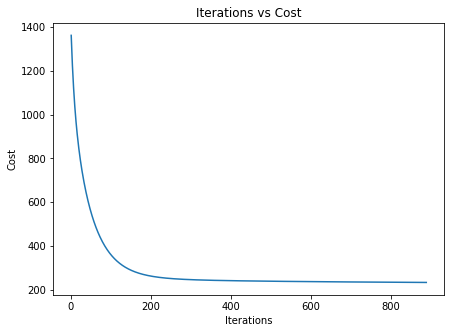

In [72]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

### Lasso Model Fitting

In [196]:
model = sklearn.linear_model.Lasso(alpha=0.6)
lasso = model.fit(X,y)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

coeffs = lasso.coef_ 
print("Coefficient Matrix of Lasso - \n\n", coeffs)

Coefficient Matrix of Lasso - 

 [ 1.87638465e+00 -3.49358931e-02 -2.51113347e-02  2.57440824e-01
  3.81033255e-02  0.00000000e+00  2.72424083e-02  2.19490518e-01
 -1.29734216e-01 -2.57914648e-03 -1.97022185e-01 -6.59051173e-03
  1.80835827e-01  1.59678702e-01 -3.92310438e-01  5.24975831e-01
 -4.95431905e-01  4.29672320e+00 -5.56894224e-02  0.00000000e+00
 -7.52434846e+00]


In [197]:
model = sklearn.linear_model.Ridge(alpha=0.6)
ridge = model.fit(X,y)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

coeffs_ridge = ridge.coef_ 
print("Coefficient Matrix of Ridge - \n\n", coeffs_ridge)

Coefficient Matrix of Ridge - 

 [ 1.75472868e+00 -4.26500288e-02 -2.56029325e-02  3.33607733e-01
  5.55348206e-02 -9.65976199e+00  8.37529116e-03  1.80347823e-01
 -1.45006700e-01 -2.94277457e-03 -1.97297600e-01 -7.83770481e-03
  2.03381414e-01  7.84827021e-02 -4.27468408e-01  6.04357492e-01
 -5.70911118e-01  2.09329632e+01 -6.79938687e-02  3.83721056e+00
 -1.51875858e+01]


### Lars Model Fitting

In [198]:
model = sklearn.linear_model.LassoLars(alpha= 0.6, normalize= False)
lasso_lars = model.fit(X,y)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

coeffs_lars = lasso_lars.coef_ 
print("Coefficient Matrix of Lasso Lars - \n\n", coeffs_lars)

Coefficient Matrix of Lasso Lars - 

 [ 1.87606540e+00 -3.49261991e-02 -2.51191490e-02  2.57451270e-01
  3.80999582e-02  0.00000000e+00  2.72458385e-02  2.19470276e-01
 -1.29731618e-01 -2.57915813e-03 -1.97017495e-01 -6.59957293e-03
  1.80832671e-01  1.59676534e-01 -3.92311558e-01  5.25038764e-01
 -4.95494247e-01  4.29763381e+00 -5.57279159e-02  0.00000000e+00
 -7.52432784e+00]


### Plot of co-efficient matrices of Lasso , Lasso-lars and Ols

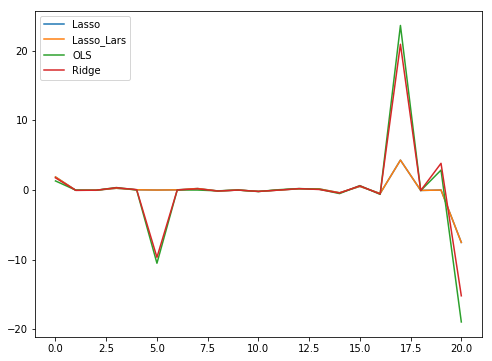

In [199]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(coeffs, label="Lasso")
ax.plot(coeffs_lars, label="Lasso_Lars")
ax.plot(res.params, label="OLS")
ax.plot(coeffs_ridge, label = "Ridge")
ax.legend(loc="best")

In [200]:
coeff_df = pd.DataFrame([np.array((df3.columns).values), coeffs, coeffs_lars,coeffs_ridge, res.params]).T 
coeff_df.columns =["Paramter", "Lasso_coefficints", "Lasso_Lars_coefficients","Ridge_coefficients","OLS_coefficients"]; coeff_df

,Paramter,Lasso_coefficints,Lasso_Lars_coefficients,Ridge_coefficients,OLS_coefficients
0,number_of_elements,1.876385,1.876065,1.754729,1.307064
1,wtd_mean_atomic_mass,-0.034936,-0.034926,-0.04265,-0.015225
2,wtd_range_atomic_mass,-0.025111,-0.025119,-0.025603,-0.033554
3,wtd_std_atomic_mass,0.257441,0.257451,0.333608,0.358775
4,wtd_mean_fie,0.038103,0.0381,0.055535,0.016987
5,wtd_entropy_fie,0.0,0.0,-9.659762,-10.509348
6,wtd_range_fie,0.027242,0.027246,0.008375,0.009256
7,wtd_mean_atomic_radius,0.219491,0.21947,0.180348,0.000864
8,wtd_range_atomic_radius,-0.129734,-0.129732,-0.145007,-0.115765
9,wtd_std_Density,-0.002579,-0.002579,-0.002943,-0.002509


### LASSO AND LASSO_LARS PATH DRAW

.

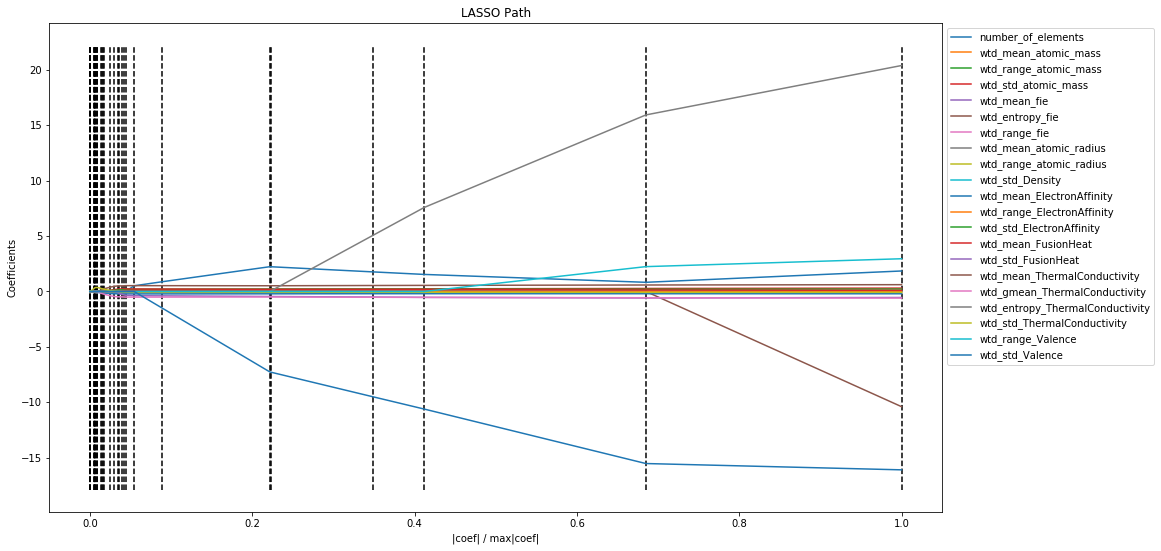

In [201]:
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)
coefs = pd.DataFrame(coefs.T, columns = df3.columns )

xx = np.sum(np.abs(np.array(coefs)), axis=1)
xx /= xx[-1]

plt.figure(figsize= (16,9))
plt.plot(xx, coefs)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.legend(df3.columns, bbox_to_anchor = (1,1))
plt.show()

.

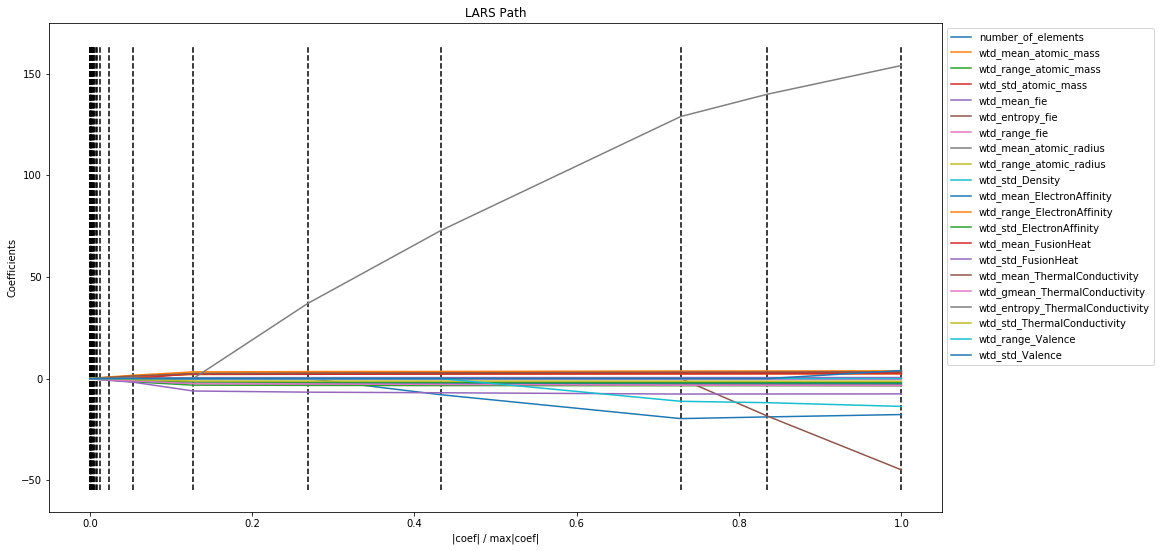

In [202]:
_, _, coefs = linear_model.lars_path(X, y, verbose=True)
coefs = pd.DataFrame(coefs.T, columns = df3.columns )

xx = np.sum(np.abs(np.array(coefs)), axis=1)
xx /= xx[-1]

plt.figure(figsize= (16,9))
plt.plot(xx, coefs)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LARS Path")
plt.axis("tight")
plt.legend(df3.columns, bbox_to_anchor = (1,1))
plt.show()

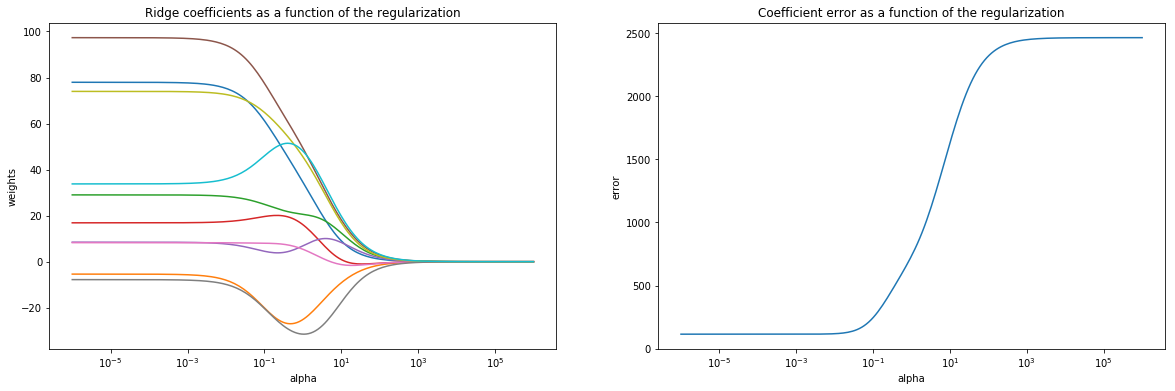

In [203]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf = Ridge()

X, y, w = make_regression(
    n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5
)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("error")
plt.title("Coefficient error as a function of the regularization")
plt.axis("tight")

plt.show()